## Data Preprocessing of centralized datasets 

In [1]:
import zipfile
import pandas as pd
import os

# Directory containing the ZIP files
data_dir = 'data/Centralized'

# Initialize an empty list to store DataFrames
dfs = []

# Define column name mappings
column_mappings = {
    'timestamp': ['Time', 'Date', 'timestamp'],
    'low': ['marketLow', 'Low', 'low'],
    'high': ['marketHigh', 'High', 'high'],
    'close': ['close', 'Close', 'marketClose'],
    'volume': ['volume', 'Volume', 'marketVolume']
}

# Function to rename columns based on mappings
def rename_columns(df):
    for standard_name, possible_names in column_mappings.items():
        for name in possible_names:
            if name in df.columns:
                df.rename(columns={name: standard_name}, inplace=True)
                break
    return df

# Iterate through all files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.zip'):
        zip_path = os.path.join(data_dir, file_name)
        with zipfile.ZipFile(zip_path, 'r') as z:
            for csv_file in z.namelist():
                if csv_file.endswith('.csv'):
                    with z.open(csv_file) as f:
                        df = pd.read_csv(f)
                        df = rename_columns(df)
                        # Keep only the required columns
                        required_columns = ['timestamp', 'low', 'high', 'close', 'volume']
                        df = df[required_columns]
                        df['file_name'] = csv_file
                        df['Zip file name'] = file_name
                        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df['Centralized/Decentralized'] = 1

# Display some heads of the combined DataFrame
print(combined_df.head())

       timestamp     low    high    close    volume  \
0  2/1/2019 9:30  166.67  167.55  167.150  789821.0   
1  2/1/2019 9:31  166.80  167.42  167.175  170656.0   
2  2/1/2019 9:32  166.88  167.20  166.910  133658.0   
3  2/1/2019 9:33  166.77  167.11  166.958  120666.0   
4  2/1/2019 9:34  166.92  167.19  167.180  102236.0   

                               file_name           Zip file name  \
0  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
1  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
2  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
3  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
4  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   

   Centralized/Decentralized  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  


## Data Preprocessing of decentralized datasets - TO DO

In [48]:
# I ran this once again yesterday to have up to date data, do not re-run 

'''
# Write here the code to get decentralized datasets

# Get eterscan Data
import requests
import json

# Etherscan API details
api_key = "5QWEKQCCI9VPTBFP6TRZU4HIE7AGTKAYR1"
address = "0x0bAe6494d778C57E1991F8651aef06f786fA23DC"
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&page=1&offset=10000&sort=asc&apikey={api_key}"

# Fetch data
response = requests.get(url)
data = response.json()

# Save data to a file
with open("transactions.json", "w") as file:
    json.dump(data, file, indent=4)

print("Transactions saved to transactions.json")'''


Transactions saved to transactions.json


In [54]:
import pandas as pd
from binance.client import Client
from datetime import datetime
import time



client = Client()  

# Date range
start_date = "2024-11-24 00:00:00"  
end_date = "2025-01-18 23:59:59"    


start_time = int(datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S").timestamp() * 1000)
end_time = int(datetime.strptime(end_date, "%Y-%m-%d %H:%M:%S").timestamp() * 1000)

# Candlestick data
symbol = "ETHUSDT"
interval = Client.KLINE_INTERVAL_5MINUTE  # 5 minute interval
klines = client.get_klines(symbol=symbol, interval=interval, startTime=start_time, endTime=end_time)


dex_df = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])


dex_df = dex_df[["timestamp", "low", "high", "close", "volume"]]


dex_df["timestamp"] = pd.to_datetime(dex_df["timestamp"], unit='ms')


dex_df[["low", "high", "close", "volume"]] = dex_df[["low", "high", "close", "volume"]].astype(float)

dex_df['Centralized/Decentralized'] = 2


print(dex_df)





              timestamp      low     high    close      volume  \
0   2024-11-23 23:00:00  3393.80  3406.00  3394.49   1162.1362   
1   2024-11-23 23:05:00  3394.49  3405.95  3401.34    875.0921   
2   2024-11-23 23:10:00  3401.18  3405.00  3403.75    506.4924   
3   2024-11-23 23:15:00  3396.22  3406.96  3396.22    966.5332   
4   2024-11-23 23:20:00  3382.00  3397.93  3387.39   2879.4244   
..                  ...      ...      ...      ...         ...   
495 2024-11-25 16:15:00  3511.60  3533.32  3527.98   5345.3576   
496 2024-11-25 16:20:00  3507.32  3532.54  3507.47   3782.5392   
497 2024-11-25 16:25:00  3500.00  3515.22  3502.40   5038.4889   
498 2024-11-25 16:30:00  3495.06  3518.63  3496.85   8111.2797   
499 2024-11-25 16:35:00  3477.58  3498.26  3480.63  10596.8900   

     Centralized/Decentralized  
0                            2  
1                            2  
2                            2  
3                            2  
4                            2  
..       

In [66]:
import pandas as pd
from datetime import datetime
import json

dex_df["timestamp"] = pd.to_datetime(dex_df["timestamp"])

# calculate gas fee in Ether
def calculate_gas_fee(gas_used, gas_price_gwei):
    
    gas_price_ether = gas_price_gwei * 10**-9  #1 Gwei = 10^-9 Ether
    return gas_used * gas_price_ether

#Load transactions
with open('data/Decentralized/transactions.json', 'r') as file:
    data = json.load(file)

transactions = data['result']

# Function to convert Unix timestamp (in seconds) to datetime
def convert_timestamp(timestamp):
    return datetime.utcfromtimestamp(int(timestamp))


processed_transactions = []


for tx in transactions:
    gas_used = int(tx['gasUsed'])
    gas_price = int(tx['gasPrice'])  # Gas price in Gwei
    
    # Convert the gas price to Gwei, and then to Ether
    gas_price= gas_price / 10**9  
    
    value = int(tx['value'])
    
    if value == 0:
        continue
    
    # Calculate the gas fee for the transaction (in Ether)
    gas_fee = calculate_gas_fee(gas_used, gas_price)
    
    processed_tx = {
        'timestamp': convert_timestamp(tx['timeStamp']),
        'gas_used': gas_used,
        'gas_price_gwei': gas_price, 
        'gas_fee_ether': gas_fee,  
        'value': value / 10**18  #in Ether
    }
    processed_transactions.append(processed_tx)


tx_df = pd.DataFrame(processed_transactions)


# Match transaction timestamp to candlestick timestamp
def match_transaction_to_candle(tx_timestamp, dex_df):
    for _, row in dex_df.iterrows():
        kline_start = row["timestamp"]
        kline_end = kline_start + pd.Timedelta(minutes=5)
        if kline_start <= tx_timestamp < kline_end:
            return row["timestamp"]
    return None  

# Add matching candlestick timestamp to the transactions
tx_df["matched_candle"] = tx_df["timestamp"].apply(lambda x: match_transaction_to_candle(x, dex_df))

tx_df = tx_df[tx_df['matched_candle'].notnull()]

# Add the relevant candlestick data (high, low, close) to the transactions
tx_df['high'] = tx_df['matched_candle'].apply(lambda x: x['high'])
tx_df['low'] = tx_df['matched_candle'].apply(lambda x: x['low'])
tx_df['close'] = tx_df['matched_candle'].apply(lambda x: x['close'])


tx_df = tx_df.drop(columns=['matched_candle'])


print(tx_df)


TypeError: 'Timestamp' object is not subscriptable

In [2]:
# Display the name of each ZIP file along with each CSV file inside

# Get the unique ZIP file names
zip_files = combined_df['Zip file name'].unique()

for zip_file in zip_files:
    print(f"ZIP file: {zip_file}")
    
    # Filter the DataFrame for the current ZIP file
    df_zip = combined_df[combined_df['Zip file name'] == zip_file]
    
    # Get the unique CSV file names within the current ZIP file
    csv_files = df_zip['file_name'].unique()
    
    for csv_file in csv_files:
        print(f"  - {csv_file}")

ZIP file: HFTTradingMAP-main.zip
  - HFTTradingMAP-main/HFTData/AAPL_n.csv
  - HFTTradingMAP-main/HFTData/AEO_n.csv
  - HFTTradingMAP-main/HFTData/AMZN_n.csv
  - HFTTradingMAP-main/HFTData/BAC_n.csv
  - HFTTradingMAP-main/HFTData/CPRI_n.csv
  - HFTTradingMAP-main/HFTData/ETHUSD-5m-data.csv
  - HFTTradingMAP-main/HFTData/GES_n.csv
  - HFTTradingMAP-main/HFTData/GOOG_n.csv
  - HFTTradingMAP-main/HFTData/GS_n.csv
  - HFTTradingMAP-main/HFTData/HD_n.csv
  - HFTTradingMAP-main/HFTData/HSBC_n.csv
  - HFTTradingMAP-main/HFTData/JCP_n.csv
  - HFTTradingMAP-main/HFTData/JPM_n.csv
  - HFTTradingMAP-main/HFTData/MSFT_n.csv
  - HFTTradingMAP-main/HFTData/TGT_n.csv
  - HFTTradingMAP-main/HFTData/TIF_n.csv
  - HFTTradingMAP-main/HFTData/WMT_n.csv
ZIP file: SPY_1min_sample_firstratedata.zip
  - SPY_1min_firstratedata.csv
ZIP file: EEM_1min_sample_firstratedata.zip
  - EEM_1min_firstratedata.csv
ZIP file: minDataSum.zip
  - A.csv
  - AG.csv
  - AL.csv
  - AP.csv
  - AU.csv
  - B.csv
  - BU.csv
  - C.c

In [12]:
print(combined_df.shape)

(25717393, 8)


Average Spread by Exchange Type:
 Centralized/Decentralized
2    6.01768
Name: Spread, dtype: float64
Active Strategy - Average Slippage: 0.12845999999999458
Passive Strategy - Average Slippage: 0.14359623015872555
Centralized Average Slippage: nan
Decentralized Average Slippage: 0.12845999999999458


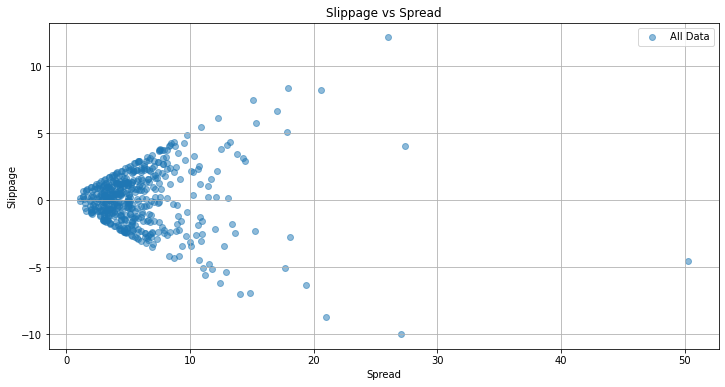

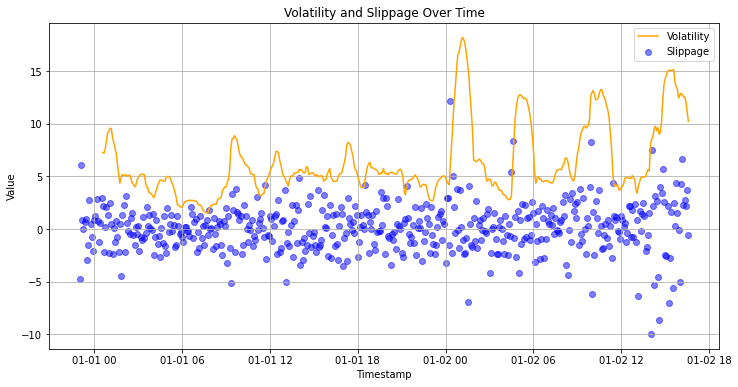

In [30]:
import matplotlib.pyplot as plt

# Load dataset
df = dex_df.copy()

# Ensure timestamp is parsed correctly
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M', errors='coerce')

# Preprocessing: Calculate Mid-Price, Slippage, and Spread
df['Mid-Price'] = (df['low'] + df['high']) / 2
df['Slippage'] = df['close'] - df['Mid-Price']
df['Spread'] = df['high'] - df['low']

#Liquidity Analysis: Average Spread
liquidity = df.groupby('Centralized/Decentralized')['Spread'].mean()
print("Average Spread by Exchange Type:\n", liquidity)

# Volatility Analysis: Rolling Volatility
df['Volatility'] = df['close'].rolling(window=20).std()

# Active vs Passive Strategy Analysis
# Define Active and Passive as sample thresholds (you can refine)
active_threshold = '1T'  # Resample to 1-minute intervals
passive_threshold = '1H'  # Resample to 1-hour intervals

df_active = df.resample(active_threshold, on='timestamp').mean(numeric_only=True)
df_passive = df.resample(passive_threshold, on='timestamp').mean(numeric_only=True)

# Compare Slippage
print("Active Strategy - Average Slippage:", df_active['Slippage'].mean())
print("Passive Strategy - Average Slippage:", df_passive['Slippage'].mean())

# Centralized vs Decentralized Comparison
centralized = df[df['Centralized/Decentralized'] == 1]
decentralized = df[df['Centralized/Decentralized'] == 2]

print("Centralized Average Slippage:", centralized['Slippage'].mean())
print("Decentralized Average Slippage:", decentralized['Slippage'].mean())

# Visualization: Slippage vs Spread
plt.figure(figsize=(12, 6))
plt.scatter(df['Spread'], df['Slippage'], alpha=0.5, label='All Data')
plt.xlabel('Spread')
plt.ylabel('Slippage')
plt.title('Slippage vs Spread')
plt.legend()
plt.grid()
plt.show()

# Visualization: Volatility and Slippage
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['Volatility'], label='Volatility', color='orange')
plt.scatter(df['timestamp'], df['Slippage'], alpha=0.5, label='Slippage', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Volatility and Slippage Over Time')
plt.legend()
plt.grid()
plt.show()
